# Previsão de Medicamentos com Machine Learning: Análise de Dados Clínicos

**Autor:** Lucas Ruschioni de Oliveira  
**Objetivo:** Prever o medicamento mais adequado para pacientes com base em suas características.

# 1. Importar Bibliotecas e Carregar Dados

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Carregar dados
dados = pd.read_csv('drug400.csv')
print("Primeiras 5 linhas:")
dados.head()

Primeiras 5 linhas:


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# 2. Análise Exploratória dos Dados


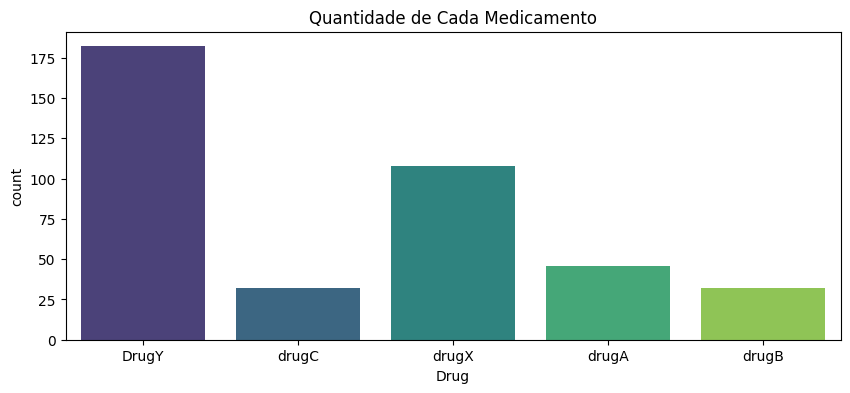

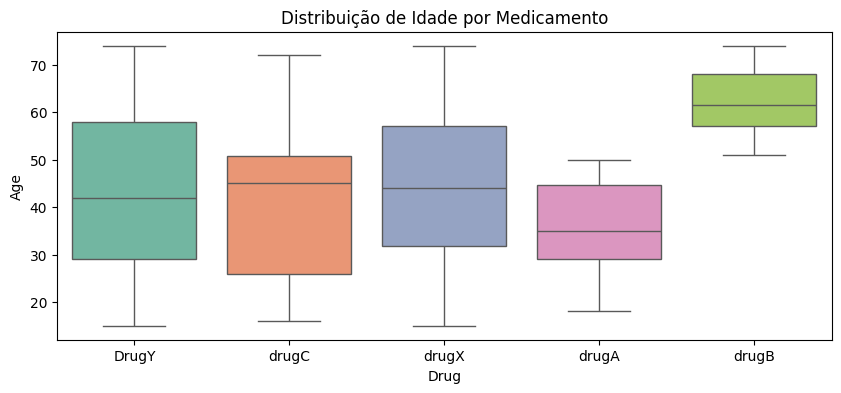

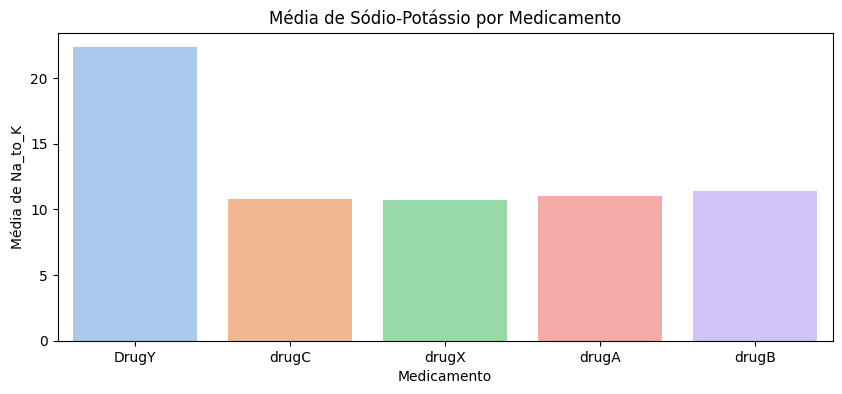

In [9]:
# Distribuição dos medicamentos
plt.figure(figsize=(10, 4))
sns.countplot(data=dados, x='Drug', hue='Drug', palette='viridis', legend=False)
plt.title('Quantidade de Cada Medicamento')
plt.show()

# Relação entre idade e medicamento
plt.figure(figsize=(10, 4))
sns.boxplot(data=dados, x='Drug', y='Age', hue='Drug', palette='Set2', legend=False)
plt.title('Distribuição de Idade por Medicamento')
plt.show()

# Média de Na_to_K por medicamento
plt.figure(figsize=(10, 4))
sns.barplot(data=dados, x='Drug', y='Na_to_K', hue='Drug', palette='pastel', errorbar=None, legend=False)
plt.title('Média de Sódio-Potássio por Medicamento')
plt.xlabel('Medicamento')
plt.ylabel('Média de Na_to_K')
plt.show()

# 3. Pré-processamento dos Dados


In [11]:
# Converter colunas categóricas para numéricas
encoder = LabelEncoder()
dados['Sex'] = encoder.fit_transform(dados['Sex'])  # F=0, M=1
dados['BP'] = encoder.fit_transform(dados['BP'])     # HIGH=0, LOW=1, NORMAL=2
dados['Cholesterol'] = encoder.fit_transform(dados['Cholesterol'])  # HIGH=0, NORMAL=1

# Separar features (X) e target (y)
X = dados.drop('Drug', axis=1)
y = dados['Drug']

# Normalizar colunas numéricas
scaler = StandardScaler()
X[['Age', 'Na_to_K']] = scaler.fit_transform(X[['Age', 'Na_to_K']])

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTamanho dos dados:")
print("Treino:", X_train.shape, "| Teste:", X_test.shape)


Tamanho dos dados:
Treino: (320, 5) | Teste: (80, 5)


# 4. Treinar e Avaliar Modelos


In [13]:
# Modelo 1: Árvore de Decisão
modelo_arvore = DecisionTreeClassifier()
modelo_arvore.fit(X_train, y_train)
pred_arvore = modelo_arvore.predict(X_test)
print("Acurácia da Árvore de Decisão:", round(accuracy_score(y_test, pred_arvore), 2))
print(classification_report(y_test, pred_arvore))

Acurácia da Árvore de Decisão: 0.96
              precision    recall  f1-score   support

       DrugY       0.97      0.93      0.95        30
       drugA       1.00      1.00      1.00        14
       drugB       1.00      1.00      1.00         9
       drugC       1.00      0.89      0.94         9
       drugX       0.90      1.00      0.95        18

    accuracy                           0.96        80
   macro avg       0.97      0.96      0.97        80
weighted avg       0.96      0.96      0.96        80



In [14]:
# Modelo 2: Regressão Logística
modelo_regressao = LogisticRegression(max_iter=1000)
modelo_regressao.fit(X_train, y_train)
pred_regressao = modelo_regressao.predict(X_test)
print("\nAcurácia da Regressão Logística:", round(accuracy_score(y_test, pred_regressao), 2))
print(classification_report(y_test, pred_regressao))


Acurácia da Regressão Logística: 0.93
              precision    recall  f1-score   support

       DrugY       0.93      0.90      0.92        30
       drugA       0.93      1.00      0.97        14
       drugB       1.00      0.89      0.94         9
       drugC       1.00      0.78      0.88         9
       drugX       0.86      1.00      0.92        18

    accuracy                           0.93        80
   macro avg       0.94      0.91      0.92        80
weighted avg       0.93      0.93      0.92        80



In [15]:
# Modelo 3: Random Forest
modelo_floresta = RandomForestClassifier()
modelo_floresta.fit(X_train, y_train)
pred_floresta = modelo_floresta.predict(X_test)
print("\nAcurácia da Random Forest:", round(accuracy_score(y_test, pred_floresta), 2))
print(classification_report(y_test, pred_floresta))


Acurácia da Random Forest: 0.99
              precision    recall  f1-score   support

       DrugY       0.97      1.00      0.98        30
       drugA       1.00      1.00      1.00        14
       drugB       1.00      1.00      1.00         9
       drugC       1.00      0.89      0.94         9
       drugX       1.00      1.00      1.00        18

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.98        80
weighted avg       0.99      0.99      0.99        80



# 5. Comparação dos Modelos




In [16]:
# Criar tabela comparativa
resultados = pd.DataFrame({
    'Modelo': ['Árvore de Decisão', 'Regressão Logística', 'Random Forest'],
    'Acurácia': [
        accuracy_score(y_test, pred_arvore),
        accuracy_score(y_test, pred_regressao),
        accuracy_score(y_test, pred_floresta)
    ]
})

print("\nComparação Final:")
display(resultados.style.background_gradient(cmap='YlGnBu'))


Comparação Final:


,Modelo,Acurácia
0,Árvore de Decisão,0.962500
1,Regressão Logística,0.925000
2,Random Forest,0.987500


# 6. Importância das Features (Random Forest)

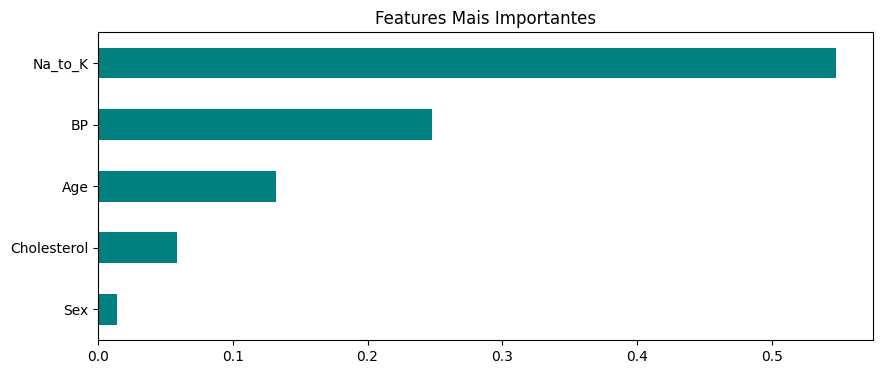

In [19]:
# Mostrar importância das features
importancias = pd.Series(modelo_floresta.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 4))
importancias.sort_values().plot(kind='barh', color='teal')
plt.title('Features Mais Importantes')
plt.show()